In [52]:
import config as c
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px

In [3]:
clientId = c.client_id
clientSecret = c.client_secret
client_credentials_manager = SpotifyClientCredentials(clientId,clientSecret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
def processPlaylist(playlistId):
    trackDetails = []
    playlist = sp.playlist_items(playlistId)
    for items in playlist['items']:
        track = items['track']
        for artist in track['artists']:
            artistDetails = sp.artist(artist['id'])
            for genre in artistDetails['genres']:
                trackDetails.append([track['id'],track['name'],track['album']['name'],artist['name'],track['album']['release_date'],track['popularity'],track['duration_ms'],genre])
    return trackDetails

In [4]:
playlists = {
2000: '37i9dQZF1DWUZv12GM5cFk',
2001: '37i9dQZF1DX9Ol4tZWPH6V',
2002: '37i9dQZF1DX0P7PzzKwEKl',
2003: '37i9dQZF1DXaW8fzPh9b08',
2004: '37i9dQZF1DWTWdbR13PQYH',
2005: '37i9dQZF1DWWzQTBs5BHX9',
2006: '37i9dQZF1DX1vSJnMeoy3V',
2007: '37i9dQZF1DX3j9EYdzv2N9',
2008: '37i9dQZF1DWYuGZUE4XQXm',
2009: '37i9dQZF1DX4UkKv8ED8jp',
2010: '37i9dQZF1DXc6IFF23C9jj',
2011: '37i9dQZF1DXcagnSNtrGuJ',
2012: '37i9dQZF1DX0yEZaMOXna3',
2013: '37i9dQZF1DX3Sp0P28SIer',
2014: '37i9dQZF1DX0h0QnLkMBl4',
2015: '37i9dQZF1DX9ukdrXQLJGZ',
2016: '37i9dQZF1DX8XZ6AUo9R4R',
2017: '37i9dQZF1DWTE7dVUebpUW',
2018: '37i9dQZF1DXe2bobNYDtW8',
2019: '37i9dQZF1DWVRSukIED0e9',
2020: '37i9dQZF1DX7Jl5KP2eZaS',
2021: '5GhQiRkGuqzpWZSE7OU4Se',
2022: '37i9dQZF1DX18jTM2l2fJY'
}
trackDetails = []
for id in playlists.values():
    trackDetails.append(processPlaylist(id))
    print(f'Playlist Done: {id}')


In [ ]:
tracksFlattened = [item for sublist in trackDetails for item in sublist]
columns = ['TrackID','TrackName','AlbumName','Artist','ReleaseDate','Popularity','Length','Genre']
df = pd.DataFrame(tracksFlattened, columns=columns)
#print(df)
df.to_csv('spotify.csv',sep=',')

                      TrackID               TrackName  \
0      6naxalmIoLFWR0siv8dnQQ  Oops!...I Did It Again   
1      6naxalmIoLFWR0siv8dnQQ  Oops!...I Did It Again   
2      2m1hi0nfMR9vdGC8UcrnwU    All The Small Things   
3      2m1hi0nfMR9vdGC8UcrnwU    All The Small Things   
4      2m1hi0nfMR9vdGC8UcrnwU    All The Small Things   
...                       ...                     ...   
10277  0FxtC8uFapbpDBliAU3sd6                     AMG   
10278  0FxtC8uFapbpDBliAU3sd6                     AMG   
10279  0FxtC8uFapbpDBliAU3sd6                     AMG   
10280  1xK59OXxi2TAAAbmZK0kBL       Romantic Homicide   
10281  1xK59OXxi2TAAAbmZK0kBL       Romantic Homicide   

                     AlbumName              Artist ReleaseDate  Popularity  \
0      Oops!... I Did It Again      Britney Spears  2000-05-16          81   
1      Oops!... I Did It Again      Britney Spears  2000-05-16          81   
2           Enema Of The State           blink-182  1999-06-01          84   
3  

In [25]:
df = pd.read_csv('spotify.csv')
df.head()

,SrNo,TrackID,TrackName,AlbumName,Artist,ReleaseDate,Popularity,Length,Genre
0,0,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,Oops!... I Did It Again,Britney Spears,16-05-2000,81,211160,dance pop
1,1,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,Oops!... I Did It Again,Britney Spears,16-05-2000,81,211160,pop
2,2,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,Enema Of The State,blink-182,01-06-1999,84,167066,alternative metal
3,3,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,Enema Of The State,blink-182,01-06-1999,84,167066,modern rock
4,4,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,Enema Of The State,blink-182,01-06-1999,84,167066,pop punk


In [33]:
df['ReleaseDate'].value_counts()
df = df[~df['ReleaseDate'].isin(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2018'])]
df.shape

(9770, 9)

In [34]:
uniqueTracks = df['TrackID'].unique()
print(len(uniqueTracks))

1973


In [35]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

C:\Users\aniru\AppData\Local\Temp\ipykernel_46192\788574948.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])


In [44]:
df['Month'] = df['ReleaseDate'].dt.month
df['Year'] = df['ReleaseDate'].dt.year

C:\Users\aniru\AppData\Local\Temp\ipykernel_46192\2848115216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['ReleaseDate'].dt.month
C:\Users\aniru\AppData\Local\Temp\ipykernel_46192\2848115216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['ReleaseDate'].dt.year


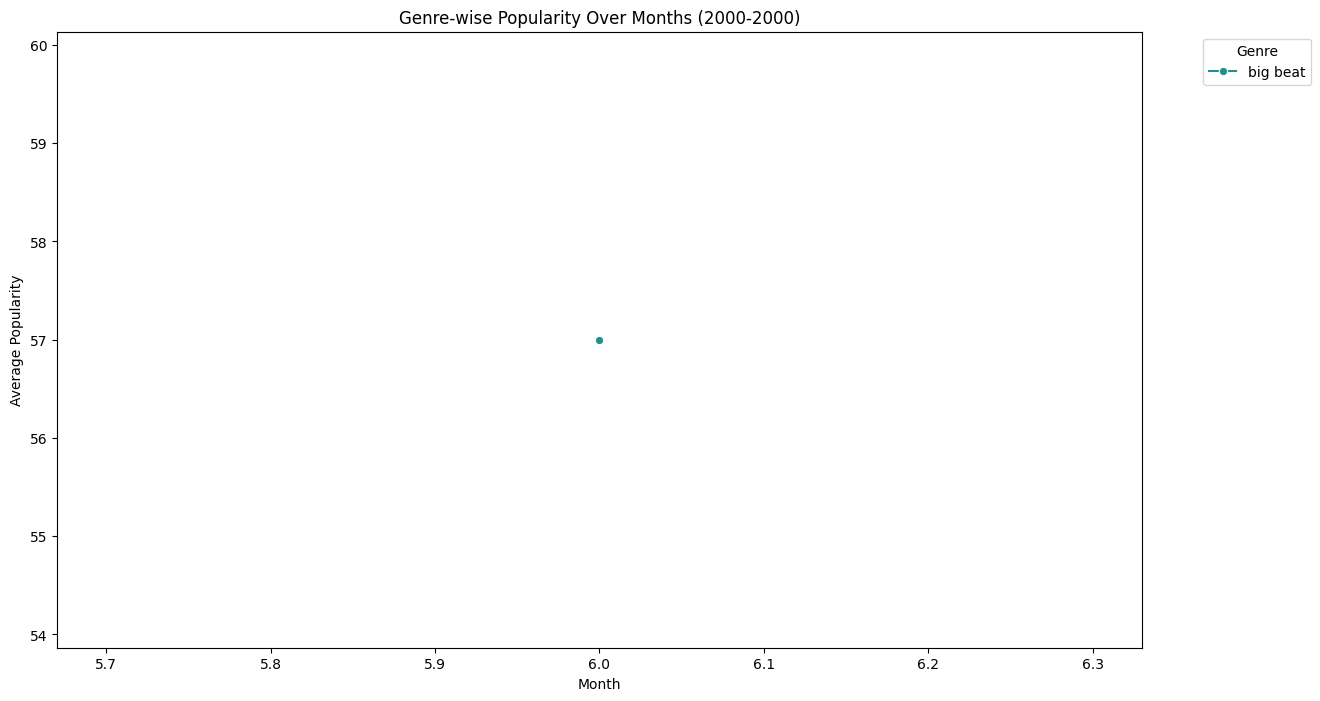

In [39]:

filtered_df = df[(df['ReleaseDate'].dt.year >= 2001) & (df['ReleaseDate'].dt.year <= 2001) & (df['Genre'] == 'big beat')]


genre_month_popularity = filtered_df.groupby(['Genre', 'Month']).agg({'Popularity': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Popularity', hue='Genre', data=genre_month_popularity, palette='viridis', marker='o')
plt.title('Genre-wise Popularity Over Months (2000-2000)')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [42]:
filtered_df = filtered_df.drop(filtered_df.index)

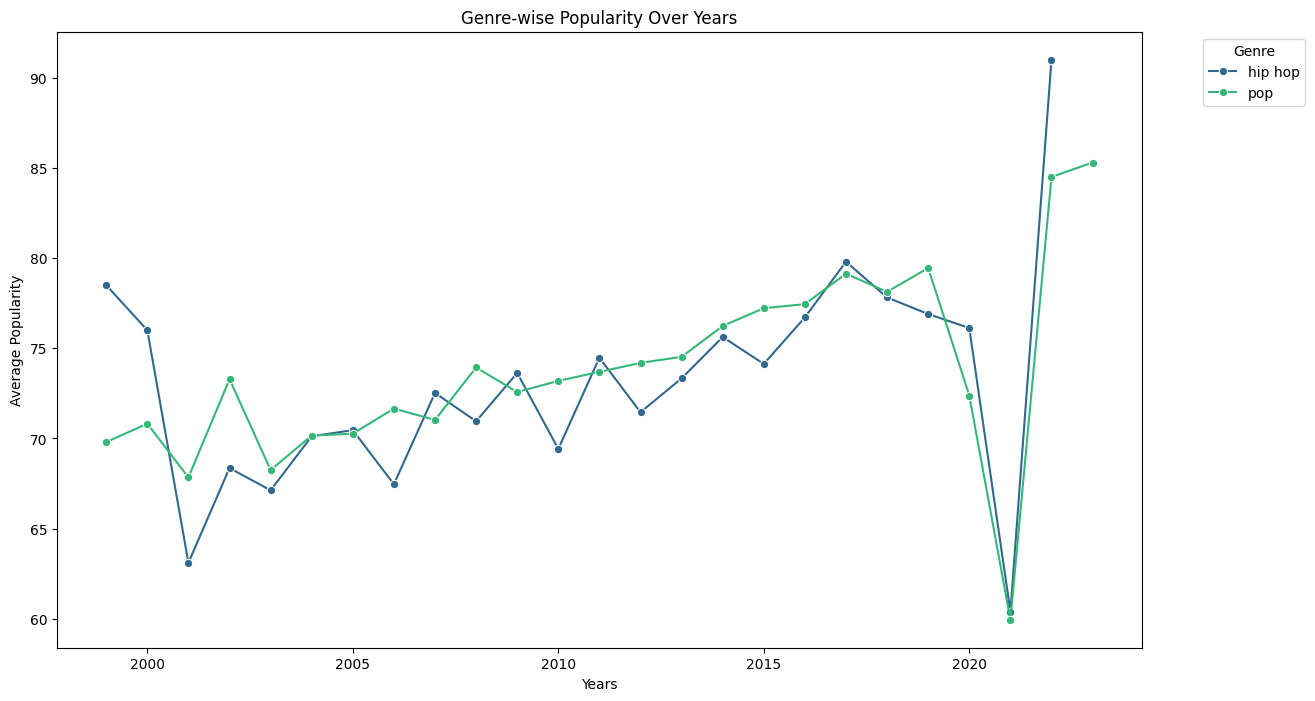

In [50]:
#filtered_df = df[(df['ReleaseDate'].dt.year >= 2001) & (df['ReleaseDate'].dt.year <= 2001) & (df['Genre'] == 'big beat')]
filtered_df = df[(df['Genre'].isin(['pop','hip hop']))]

genre_month_popularity = filtered_df.groupby(['Genre', 'Year']).agg({'Popularity': 'mean'}).reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Popularity', hue='Genre', data=genre_month_popularity, palette='viridis', marker='o')
plt.title('Genre-wise Popularity Over Years')
plt.xlabel('Years')
plt.ylabel('Average Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [55]:
df.head()
df.to_csv('spotifyFinal.csv',sep=',')

In [53]:
st.title("Interactive Genre-wise Popularity Over Years")

# Genre Filter
selected_genre = st.multiselect("Select Genre", df['Genre'].unique())

# Filter DataFrame
filtered_df = df[df['Genre'].isin(selected_genre)]

# Plot
fig = px.line(
    filtered_df,
    x='Year',
    y='Popularity',
    color='Genre',
    markers=True,
    title='Genre-wise Popularity Over Years',
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='Average Popularity',
    legend_title='Genre',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

# Display Plot
st.plotly_chart(fig)

2023-11-29 21:46:59.250 
  command:

    streamlit run d:\Anaconda\envs\dataviz\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()